## первый

In [11]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
breast_cancer_dataset = load_breast_cancer()

### Изучение данных

In [4]:
len(breast_cancer_dataset['feature_names'])
print("Ключи digits_dataset: \n{}\n".format(breast_cancer_dataset.keys()))
print(breast_cancer_dataset['DESCR']+"\n")
print("Названия ответов: {}\n".format(breast_cancer_dataset['target_names']))
print("Названия признаков: \n{}\n".format(breast_cancer_dataset['feature_names']))
print("Форма массива data: \n{}\n".format(breast_cancer_dataset['data'].shape))
print("Первые 10 строк массива data: \n{}\n".format(breast_cancer_dataset['data'][:10]))
print("Форма массива target: \n{}\n".format(breast_cancer_dataset['target'].shape))
print("Ответы (первые сто): \n{}".format(breast_cancer_dataset['target'][:100]))


Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/l

### Разделение данных на обучающие и тестовые наборы

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset['data'], breast_cancer_dataset['target'],random_state=0)

In [6]:
# обзор размера разделенных данных
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_train: (426, 30)
Форма массива y_train: (426,)
Форма массива X_test: (143, 30)
Форма массива y_test: (143,)


### Исследовать данные с помощью визуализации

<Figure size 640x480 with 0 Axes>

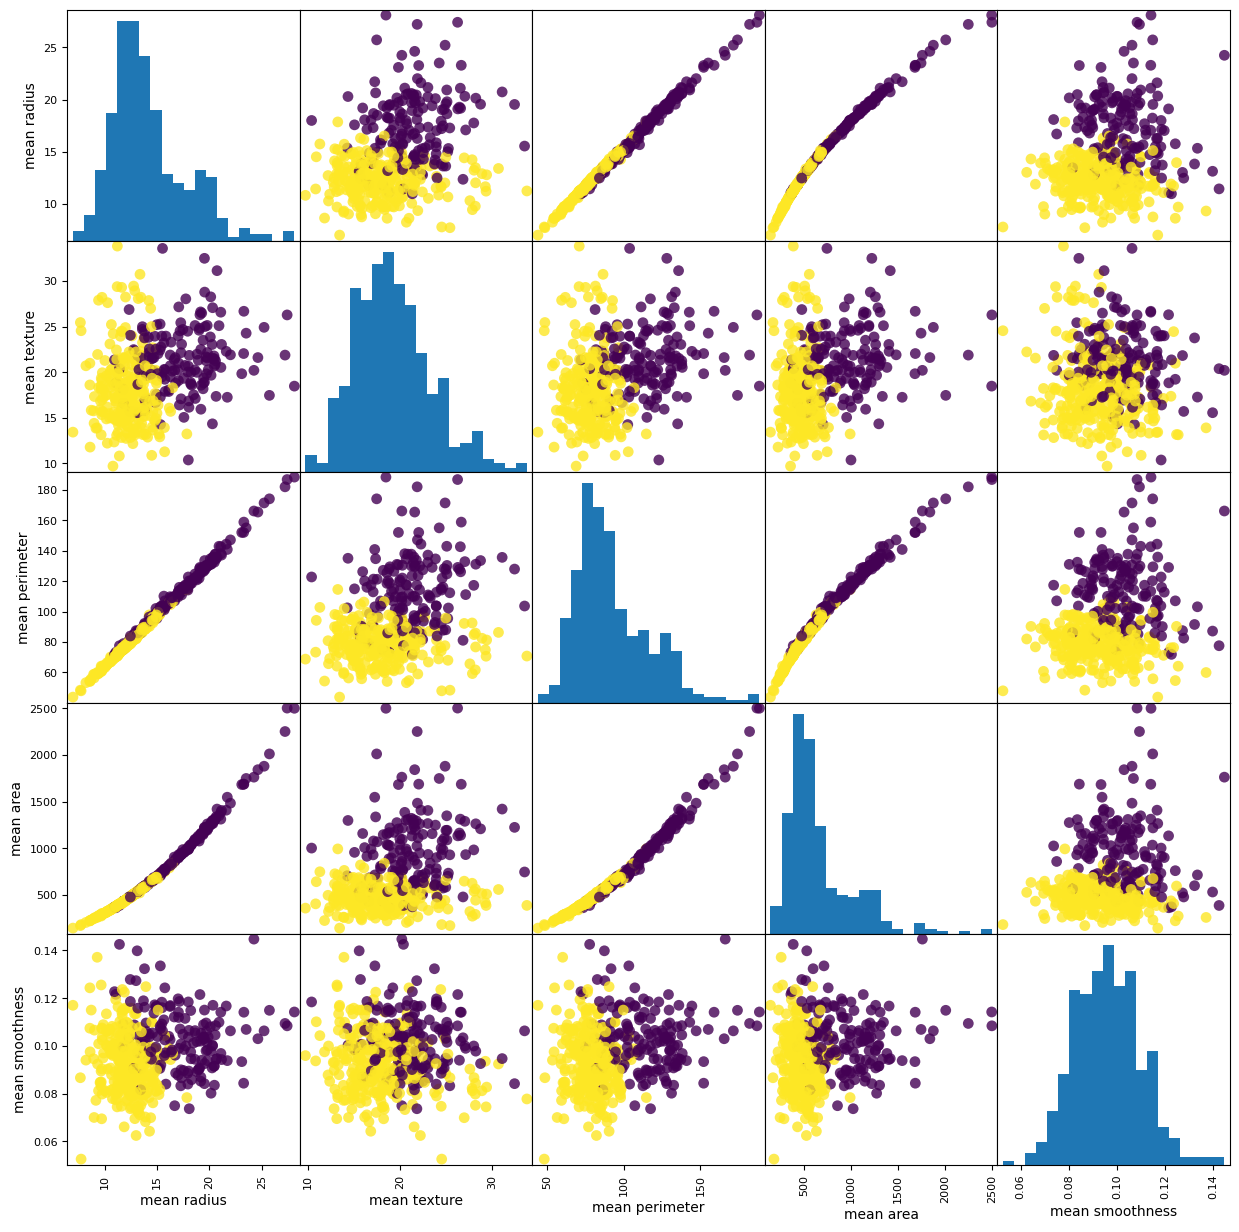

In [9]:
# Визуализация всех возможных пар признаков с помощью диаграмы рассеяния
# Гистограмма не очень читаема при всех признаках,
# поэтому я вывел только первые пять признаков

plt.figure()
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в breast_cancer_dataset.features_names
breast_cancer_dataframe = pd.DataFrame(X_train[:,:5], columns=breast_cancer_dataset.feature_names[:5])
# создаем таблицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.plotting.scatter_matrix(breast_cancer_dataframe, c=y_train, figsize=(15,15), marker='o',
                                 hist_kwds={'bins':20}, s=60, alpha=.8)

In [10]:
# метод k-средних.
# при увеличении соседей растет

from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Здесь я решил вывести прогнозы с 10 соседями
# Максимума 96% достиг с 9 соседями
# Пик - 96%

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    # помещяем тренировочные модели для классификации
    knn.fit(X_train, y_train)
    
    # тестируем нашу модель
    y_pred = knn.predict(X_test)
    print("Прогнозы для тестового набора (кол. соседей: {}): \n{}".format(i,y_pred))

    # Проверка точности обученной модели
    print("Правильность на текстовом наборе: {:.2f} %".format(np.mean(y_pred == y_test)))
    print("Правильность на текстовом наборе: {:.2f} %\n".format(knn.score(X_test, y_test)))

Прогнозы для тестового набора (кол. соседей: 1): 
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
Правильность на текстовом наборе: 0.92 %
Правильность на текстовом наборе: 0.92 %

Прогнозы для тестового набора (кол. соседей: 2): 
[0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
Правильность на текстовом наборе: 0.90 %
Правильность на текстовом наборе: 0.90 %

Прогнозы для тестового набора (кол. соседей: 3): 
[0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 